### Logisti Regression using ROC Curve and AUC Score

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
x,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
### Create a dummy model which give same output
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
### Create normal Logistic Regression
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [8]:
### PRediction based on probabilty
model_prob=model.predict_proba(x_test)

In [ ]:
### Lets focus on positive outcome
model_prob=model_prob[:,1] ### Will take 1 index value in evrery row prediction

In [12]:
### LEts calculate ROC and AUC Score
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
print(dummy_model_auc)
model_auc=roc_auc_score(y_test,model_prob)
print(model_auc)

0.5
0.9263359999999999


In [21]:
### TO get ROC curves plot False Postive Rate (FPR) on X Axis and True Positive Rate (TPR) on y-axis
dummy_fpr,dummy_tpr,dummy_threshold=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,model_threshold=roc_curve(y_test,model_prob)

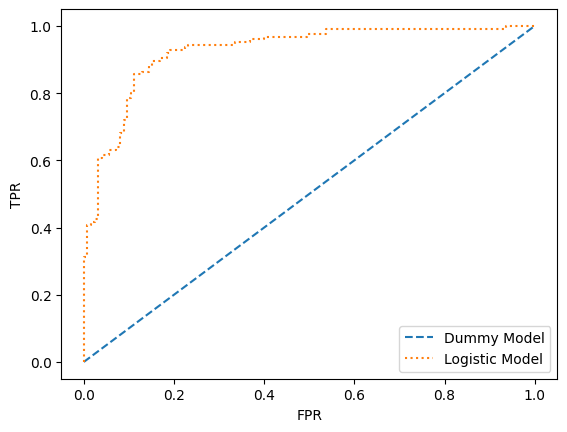

In [22]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,linestyle='dotted',label='Logistic Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

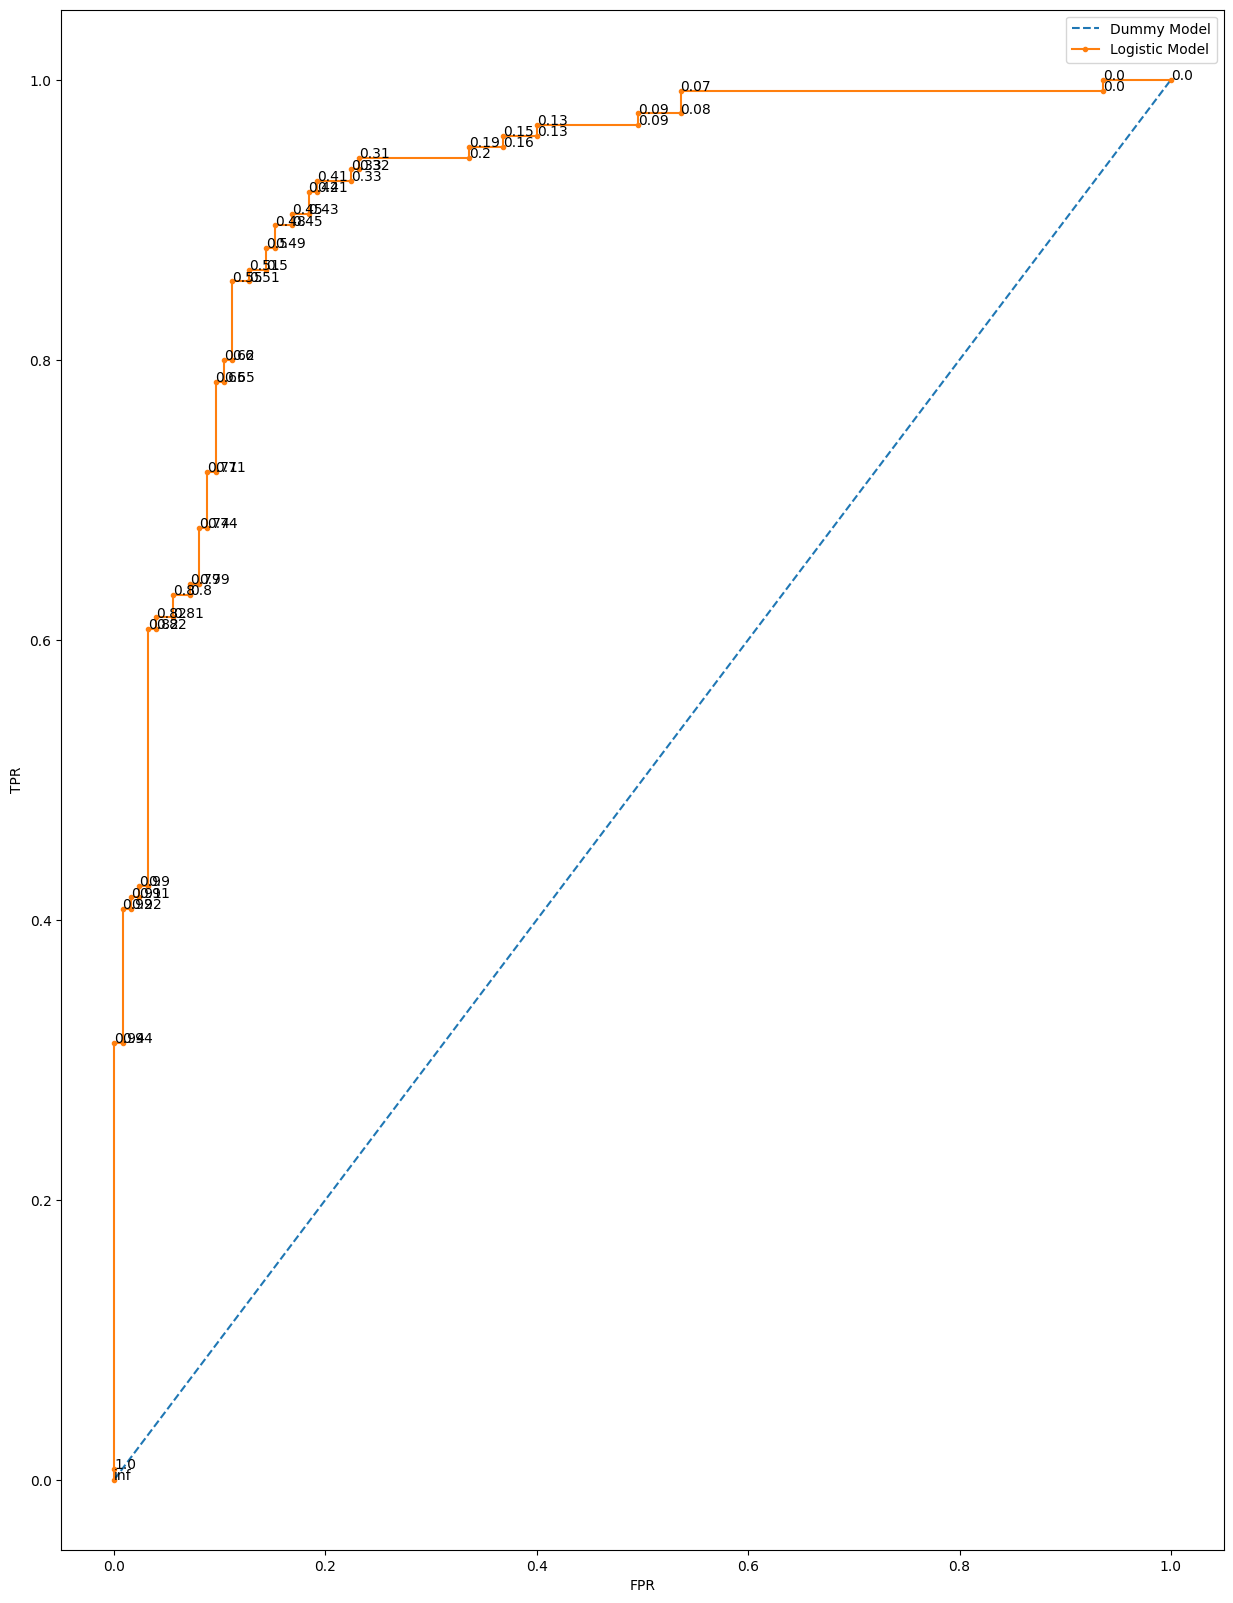

In [29]:
fig=plt.figure(figsize=(15,20))

ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,model_threshold):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()